In [ ]:
#x\from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lets use some POS taggers and see how they perform.
**Regualar expression tagger**

In [1]:
import nltk
from pprint import pprint
nltk.download('brown')
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
 ]
regexp_tagger = nltk.RegexpTagger(patterns)
print(brown_sents[3])
pprint(regexp_tagger.tag(brown_sents[3]))
print("Accuracy: ",  regexp_tagger.evaluate((brown_tagged_sents)))


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\tommc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports', 'was', 'received', "''", ',', 'the', 'jury', 'said', ',', '``', 'considering', 'the', 'widespread', 'interest', 'in', 'the', 'election', ',', 'the', 'number', 'of', 'voters', 'and', 'the', 'size', 'of', 'this', 'city', "''", '.']
[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]


C:\Users\tommc\AppData\Local\Temp\ipykernel_4768\3004360254.py:20: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print("Accuracy: ",  regexp_tagger.evaluate((brown_tagged_sents)))


Accuracy:  0.20326391789486245


# Separating the training and the test data and then training and testing a tagger.

In [3]:
import nltk
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
size = int(len(brown_tagged_sents) * 0.9)
print(size)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
print(unigram_tagger.evaluate(test_sents))

4160
0.8121200039868434


C:\Users\tommc\AppData\Local\Temp\ipykernel_4768\187729427.py:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(unigram_tagger.evaluate(test_sents))


# Storing a trained model, retrieving it and using it.

In [6]:
#Store it.
from pickle import dump
output = open('ugTagger.pkl', 'wb')
dump(unigram_tagger, output, -1)
output.close()

#Retrieve it from a file
from pickle import load
input = open('ugTagger.pkl', 'rb')
tagger = load(input)
input.close()
#Use it.
text = "The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."
tokens = text.split()
print(tagger.tag(tokens))

[('The', 'AT'), ("board's", 'NN$'), ('action', 'NN'), ('shows', 'NNS'), ('what', 'WDT'), ('free', 'JJ'), ('enterprise', 'NN'), ('is', 'BEZ'), ('up', 'RP'), ('against', 'IN'), ('in', 'IN'), ('our', 'PP$'), ('complex', 'JJ'), ('maze', None), ('of', 'IN'), ('regulatory', None), ('laws', 'NNS'), ('.', '.')]


# Using confusion matrix for evaluation.

In [7]:
from nltk.metrics import *
ref  =   'DET NN VB DET JJ NN NN IN DET NN'.split()
tagged = 'DET VB VB DET NN NN NN IN DET NN'.split()
cm = ConfusionMatrix(ref, tagged)
print(cm)
print("Precision: ",precision(set(ref),set(tagged)))
print("Recall: ",recall(set(ref),set(tagged)))
print("F measure: ",f_measure(set(ref),set(tagged)))
print("Accuracy: ",accuracy(ref,tagged))

    | D         |
    | E I J N V |
    | T N J N B |
----+-----------+
DET |<3>. . . . |
 IN | .<1>. . . |
 JJ | . .<.>1 . |
 NN | . . .<3>1 |
 VB | . . . .<1>|
----+-----------+
(row = reference; col = test)

Precision:  1.0
Recall:  0.8
F measure:  0.8888888888888888
Accuracy:  0.8


# Another way, library, whats the difference?

In [8]:

from sklearn import metrics
print(metrics.classification_report(ref, tagged))

              precision    recall  f1-score   support

         DET       1.00      1.00      1.00         3
          IN       1.00      1.00      1.00         1
          JJ       0.00      0.00      0.00         1
          NN       0.75      0.75      0.75         4
          VB       0.50      1.00      0.67         1

    accuracy                           0.80        10
   macro avg       0.65      0.75      0.68        10
weighted avg       0.75      0.80      0.77        10


C:\Users\tommc\anaconda3\envs\AUTTM\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tommc\anaconda3\envs\AUTTM\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tommc\anaconda3\envs\AUTTM\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Extracting noun phrases/chunking

In [9]:
#Collect all nouns and their modifiers
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("Wall Street Journal just published an interesting piece on crypto currencies")
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.label_, chunk.root.text)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

#Load a vocabulary and specify a corpus

In [ ]:
nlp = spacy.load('en_core_web_sm')
#doc = nlp('John ate icecream with spoon')
#doc = nlp('John ate icecream and Peter ate apple')
doc = nlp('Wall Street Journal just published an interesting piece on crypto currencies')
#doc = nlp('A man with a knife and a boy hit the dazed shopkeeper on the head yesterday.')

In [ ]:
def printDocDep(doc):
  for token in doc:
    print("{0}/{1} <--{2}-- {3}/{4}".format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

In [ ]:
printDocDep(doc)

Wall/NNP <--compound-- Street/NNP
Street/NNP <--compound-- Journal/NNP
Journal/NNP <--nsubj-- published/VBD
just/RB <--advmod-- published/VBD
published/VBD <--ROOT-- published/VBD
an/DT <--det-- piece/NN
interesting/JJ <--amod-- piece/NN
piece/NN <--dobj-- published/VBD
on/IN <--prep-- piece/NN
crypto/JJ <--amod-- currencies/NNS
currencies/NNS <--pobj-- on/IN


#Display a dependency tree.

In [ ]:
from spacy import displacy
displacy.render(doc, style='dep', jupyter = True, options={'distance': 100})

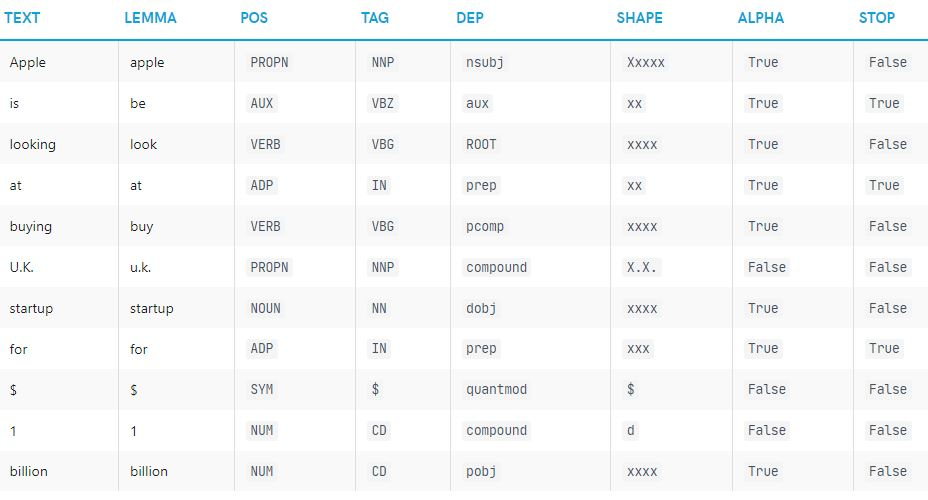

#Extracting clauses using tagged text.

In [ ]:
from spacy.symbols import nsubj, VERB, dobj, pobj, NOUN,PROPN, PERSON

persons, nouns,verbs = [],[],[]
subjs, dobjs, headVerbs = [],[],[]

for token in doc:

    if token.pos == NOUN or token.pos == PROPN: nouns.append(token)
    if token.pos == VERB: verbs.append(token)
    if token.ent_type == PERSON: persons.append(token)

    if token.dep == nsubj: subjs.append(token)
    if token.dep == dobj: dobjs.append(token)

    if token.dep == nsubj and token.head.pos == VERB:
        headVerbs.append(token.head)

    if token.dep == nsubj and token.head.pos == VERB:
      print([child for child in token.head.children]) # Tree navigation
print(subjs, headVerbs, dobjs)

[Journal, just, piece]
[Journal] [published] [piece]


#Matching patterns using tags from Spacy

In [ ]:
from spacy.matcher import Matcher
doc = nlp('I scored a try and he talked about it')
matcher = Matcher(vocab = nlp.vocab)
p_v= [{'POS': 'PRON'},{'POS': 'VERB'}] #pronoun followed by a verb
about = [{'POS': 'VERB'},{'LEMMA':'about'}] #verb followd by the token "about"
matcher.add('pronoun+verb''about', patterns=[p_v,about])

result = matcher(doc,as_spans=True)
print(result)

[I scored, he talked, talked about]
